In [18]:
# Importing LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Loading The Dataset
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\Data\People Charm case.csv")
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
# Lowering The Columns Name
df.columns=df.columns.str.lower()
df.columns

Index(['satisfactorylevel', 'lastevaluation', 'numberofprojects',
       'avgmonthlyhours', 'timespent.company', 'workaccident', 'left',
       'promotioninlast5years', 'dept', 'salary'],
      dtype='object')

In [22]:
# Finding The Unique Value
df['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [23]:
# Find The Unique Value
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

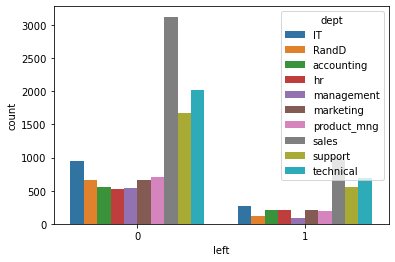

In [24]:
# Distribution Of Left Columns With Respect To Department
sns.countplot(data=df.sort_values(by='dept'),x='left',hue='dept')

In [25]:
# LABEL ENCODING THE DEPATEMENT AND SALARY COLUMNS WITH RESPECT TO MEAN OF LEFT COLUMNS
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
ctg=df[['dept','salary','left']]
for i in ctg.columns[:-1]:
    ctg_mean = ctg.groupby(i).mean()
    enc=pd.Series(data=lb.fit_transform(ctg_mean), index=ctg_mean.index)
    df[i]=df[i].map(enc)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [26]:
df.head()

,satisfactorylevel,lastevaluation,numberofprojects,avgmonthlyhours,timespent.company,workaccident,left,promotioninlast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,5,2
1,0.80,0.86,5,262,6,0,1,0,5,1
2,0.11,0.88,7,272,4,0,1,0,5,1
3,0.37,0.52,2,159,3,0,1,0,5,2
4,0.41,0.50,2,153,3,0,1,0,5,2


In [27]:
# CALCULATINGG OUTLIER FOR WHOLE DATASET
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


satisfactorylevel           0
lastevaluation              0
numberofprojects            0
avgmonthlyhours             0
timespent.company        1282
workaccident             2169
left                     3571
promotioninlast5years     319
dept                        0
salary                      0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1623512dfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1623513a6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1623512dc40>],
 'medians': [<matplotlib.lines.Line2D at 0x1623513ad60>],
 'fliers': [<matplotlib.lines.Line2D at 0x162351450a0>],
 'means': []}

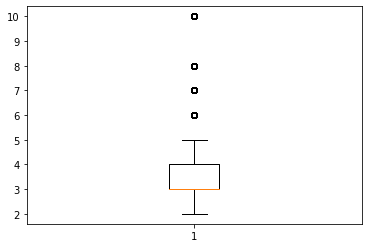

In [28]:
plt.boxplot(df['timespent.company'])

In [30]:
# HANDLING THE OUTLIER
q75, q25 = np.percentile(df['timespent.company'],[75,25])
iqr = q75 - q25
minimum = q25 - 1.5 * iqr
maximum = q75 + 1.5 * iqr
df.loc[df ["timespent.company"] < minimum, "timespent.company"] = minimum
df.loc[df ["timespent.company"] > maximum, "timespent.company"] = maximum

{'whiskers': [<matplotlib.lines.Line2D at 0x162351ed160>,
 'caps': [<matplotlib.lines.Line2D at 0x162351ed820>,
 'boxes': [<matplotlib.lines.Line2D at 0x162351dddc0>],
 'medians': [<matplotlib.lines.Line2D at 0x162351edee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x162351f7220>],
 'means': []}

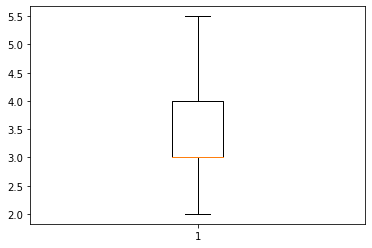

In [31]:
plt.boxplot(df['timespent.company'])

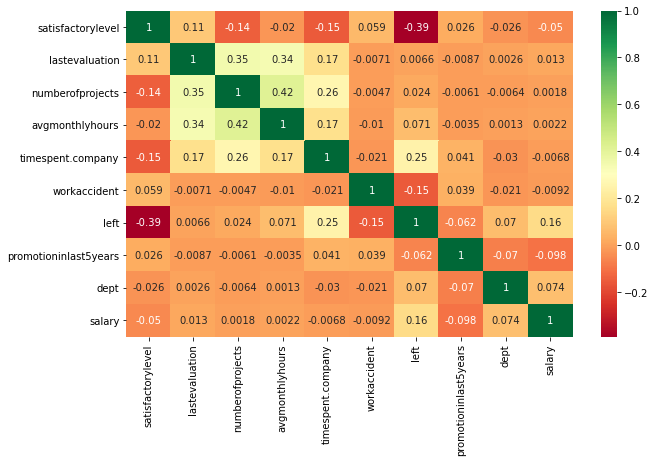

In [32]:
# FINDING THE CORRELEATION WITH THE DIFFERENT COLUMNS
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

## PREPARING THE DATA FOR MODEL PREPARATION

In [33]:
#Selecting Independent Variables
X = df[["satisfactorylevel", "timespent.company", "workaccident", "salary"]].values
#Selecting Dependent Variables
y = df["left"].values

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [35]:
# FEATURE SCALING
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
sc_Xtrain=sc.fit_transform(X_train)
sc_Xtest=sc.fit_transform(X_test)

# KNN MODEL IMPLEMENTATION

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
knn_pred=knn.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve,auc
print("Confusion_Matrix :\n", confusion_matrix(y_test, knn_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, knn_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, knn_pred))

Confusion_Matrix :
 [[2217   71]
 [  83  629]]


Accuracy:
 0.9486666666666667


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      2288
           1       0.90      0.88      0.89       712

    accuracy                           0.95      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



In [43]:
#ROC AND AUC CURVE
knn_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, knn_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9641789478078101

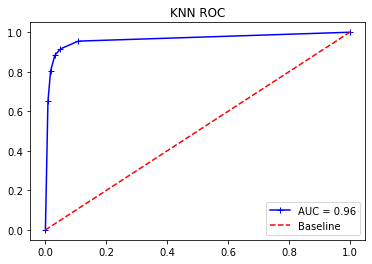

In [44]:
#PLotting roc_curve
plt.title("KNN ROC")
plt.plot(fpr, tpr,"b+-",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# LOGISTIC REGRESSION IMPLEMENTATION

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [50]:
lr_pred=lr.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve,auc
print("Confusion_Matrix :\n", confusion_matrix(y_test, lr_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, lr_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, lr_pred))

Confusion_Matrix :
 [[1731  557]
 [ 135  577]]


Accuracy:
 0.7693333333333333


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.83      2288
           1       0.51      0.81      0.63       712

    accuracy                           0.77      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.83      0.77      0.78      3000



In [52]:
#ROC AND AUC CURVE
lr_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, lr_proba)
auc_score = auc(fpr, tpr)
auc_score

0.8333043799599278

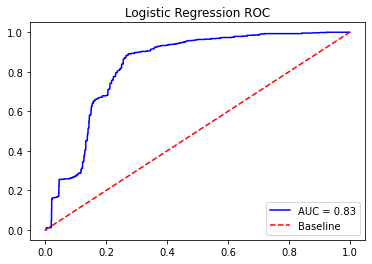

In [53]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Logistic Regression ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

In [54]:
#Finding Threshold Value where "False Positive" is less
threshold_data = pd.DataFrame({"Threshold": threshold, "TPR": tpr, "FPR":fpr})
threshold_data[(threshold_data["TPR"].between(0.95,0.85)) |(threshold_data["FPR"].between(0.25,0.4))]

,Threshold,TPR,FPR
318,0.488550,0.818820,0.250000
319,0.487040,0.838483,0.250437
320,0.486400,0.838483,0.250874
321,0.483381,0.838483,0.252622
322,0.481871,0.838483,0.253059
...,...,...,...
427,0.345187,0.932584,0.392045
428,0.341996,0.932584,0.392920
429,0.341883,0.933989,0.397290
430,0.340524,0.933989,0.398601


In [55]:
#FIXING THE THRESHOLD VALUE FOR PARTICULAR CASE BY USING BINARIZER CALSSIFIER
from sklearn.preprocessing import binarize
lr_pred_class = binarize([lr_proba], threshold = 0.48)[0]
print(confusion_matrix(y_test, lr_pred_class))
accuracy_score(y_test, lr_pred_class)

[[1707  581]
 [ 115  597]]


0.768

# NAIVE BAYES MODEL IMPLEMENTATION

In [56]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [57]:
gb_pred=gb.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve,auc
print("Confusion_Matrix :\n", confusion_matrix(y_test, gb_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, gb_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, gb_pred))

Confusion_Matrix :
 [[2049  239]
 [ 380  332]]


Accuracy:
 0.7936666666666666


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      2288
           1       0.58      0.47      0.52       712

    accuracy                           0.79      3000
   macro avg       0.71      0.68      0.69      3000
weighted avg       0.78      0.79      0.79      3000



In [61]:
#ROC AND AUC CURVE
gb_proba = gb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, gb_proba)
auc_score = auc(fpr, tpr)
auc_score

0.8386510347096723

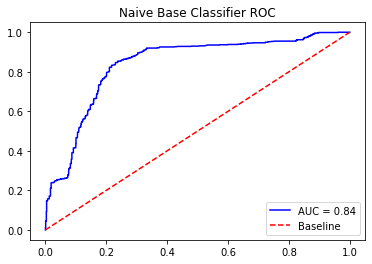

In [62]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Naive Base Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# DECESION TREE CLASSIFIER IMPLEMENTATION

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
dtc_pred=dtc.predict(X_test)

In [65]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, dtc_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, dtc_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, dtc_pred))

Confusion_Matrix :
 [[2226   62]
 [  78  634]]


Accuracy:
 0.9533333333333334


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2288
           1       0.91      0.89      0.90       712

    accuracy                           0.95      3000
   macro avg       0.94      0.93      0.94      3000
weighted avg       0.95      0.95      0.95      3000



In [67]:
#ROC AND AUC CURVE
dtc_proba = dtc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, dtc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9688356324153375

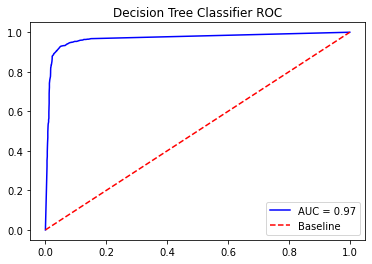

In [68]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Decision Tree Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# RANDOM FOREST CLASSIFIER IMPLEMENTATION

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
rfc_pred=rfc.predict(X_test)

In [71]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, rfc_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, rfc_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, rfc_pred))

Confusion_Matrix :
 [[2227   61]
 [  77  635]]


Accuracy:
 0.954


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2288
           1       0.91      0.89      0.90       712

    accuracy                           0.95      3000
   macro avg       0.94      0.93      0.94      3000
weighted avg       0.95      0.95      0.95      3000



In [72]:
#ROC AND AUC CURVE
rfc_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, rfc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9744683424019799

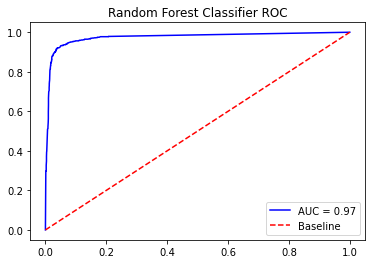

In [73]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("Random Forest Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# ADA BOOST CLASSIFIER IMPLEMENTATION

In [80]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [75]:
abc_pred=abc.predict(X_test)

In [76]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, abc_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, abc_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, abc_pred))

Confusion_Matrix :
 [[2214   74]
 [ 131  581]]


Accuracy:
 0.9316666666666666


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2288
           1       0.89      0.82      0.85       712

    accuracy                           0.93      3000
   macro avg       0.92      0.89      0.90      3000
weighted avg       0.93      0.93      0.93      3000



In [78]:
#ROC AND AUC CURVE
abc_proba = abc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, abc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9561868959691994

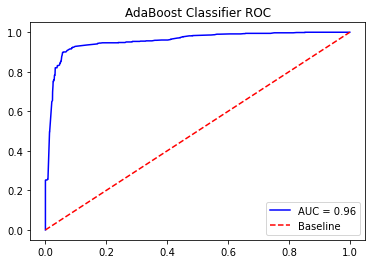

In [79]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("AdaBoost Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# XG BOOST CLASSIFIER IMPLEMENTATION

In [81]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
xgb_pred=xgb.predict(X_test)

In [83]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, xgb_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, xgb_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Confusion_Matrix :
 [[2235   53]
 [  81  631]]


Accuracy:
 0.9553333333333334


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      2288
           1       0.92      0.89      0.90       712

    accuracy                           0.96      3000
   macro avg       0.94      0.93      0.94      3000
weighted avg       0.95      0.96      0.96      3000



In [84]:
#ROC AND AUC CURVE
xgb_proba = xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, xgb_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9770851953524003

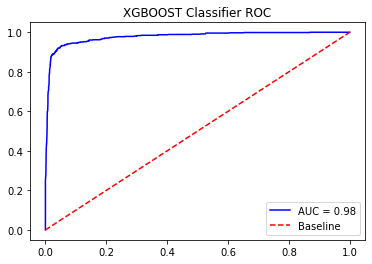

In [85]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("XGBOOST Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# GRADIENT BOOSTING CLASSIFIER IMPLEMENTATION

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [87]:
gbc_pred=gbc.predict(X_test)

In [88]:
print("Confusion_Matrix :\n", confusion_matrix(y_test, gbc_pred))
print("\n")
print("Accuracy:\n",accuracy_score(y_test, gbc_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, gbc_pred))

Confusion_Matrix :
 [[2226   62]
 [  75  637]]


Accuracy:
 0.9543333333333334


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2288
           1       0.91      0.89      0.90       712

    accuracy                           0.95      3000
   macro avg       0.94      0.93      0.94      3000
weighted avg       0.95      0.95      0.95      3000



In [89]:
#ROC AND AUC CURVE
gbc_proba = gbc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, gbc_proba)
auc_score = auc(fpr, tpr)
auc_score

0.9709322454231162

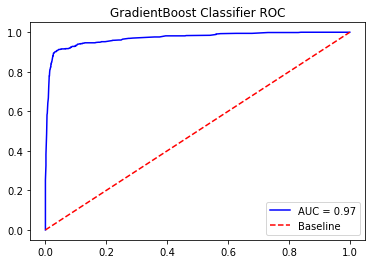

In [90]:
#PLotting roc_curve
baseline_x =[0,0]
baseline_y =[1,1]
plt.title("GradientBoost Classifier ROC")
plt.plot(fpr, tpr,"b",label = "AUC = %.2f" % auc_score)
plt.plot([0,1], "r--",label = "Baseline")
plt.legend()

# K-FOOLD CROSS VALIDATION IMPLEMENTATION

In [91]:
from sklearn.model_selection import cross_val_score 

In [93]:
model_list = [knn, lr,gb, dtc, rfc, abc, xgb, gbc] #LIST OF MODEL OBJECTS
#LOOPING THROUGH EACH MODEL FOR CROSS VALIDATION
accuracy = []
for i in model_list:
    accuracies =cross_val_score(estimator = i, X= X_train, y = y_train, cv = 10, scoring = "accuracy")
    accuracies_mean = accuracies.mean()
    accuracy.append(accuracies_mean)

# MODEL AND ACCURACIES ON SINGLE DATAFRAME

In [94]:
model = ["KNearest Neighbors","Logistic Regression","Naive Bayes", "Decision Tree Classifier", "Random Forest Classifier", "AdaBoost Classifier", "XGBBOOST Classifier", "Gradient Boosting Classifier"]

In [95]:
model_accuracy = pd.DataFrame({"Model": model, "Accuracies": accuracy}).sort_values(by = "Accuracies",ascending = False).reset_index().drop("index", axis = 1)

In [96]:
model_accuracy

,Model,Accuracies
0,Random Forest Classifier,0.952996
1,XGBBOOST Classifier,0.952913
2,Decision Tree Classifier,0.952829
3,Gradient Boosting Classifier,0.950329
4,KNearest Neighbors,0.949829
5,AdaBoost Classifier,0.928495
6,Naive Bayes,0.787233
7,Logistic Regression,0.769231


# CONCLUSION

# 1. BEST MODEL FOR ABOVE DATASET

From Above dataframe i.e model_accuracies we can conclude that "RANDOM FOREST", "XGBBOOST", "DECISION TREE", "GRADIENT BOOSTING" are performing almost equal when accuracy is considered upto 2 decimal. But, Selectively we can choose "RANDOM FOREST MODEL" to classify the given problem because it evident that accuracy of "RANDOM FOREST" is more than all above mentioned algorithms and is more efficient than others as other Algorithm consumes more Resources.

# 2. COMMENTS ON ACCURACY A GOOD MEASURE OR NOT?

Accuracy can be misleading. For example, in a problem where there is a large class imbalance, a model can predict the value of the majority class for all predictions and achieve a high classification accuracy. In such case, we need to go for different measures techniques that are as follows:

1. **ROC CURVE**: From ROC curve we can find a perfect **THRESHOLD** where over **FALSE POSITIVE RATE** is minimum and **TRUE POSITIVE RATE** is maximum.Therefore, Accuracy could decrease or increase it depends upon cases after fixing the **Perfect THRESHOLD**.Hence, from here we can say that not always Accuracy is considered to be best estimator of a model therefore,other parameters are required to draw conclusion about EVALUATION OF **MODEL PERFORMANCE**.

2. **PRECISION AND RECALL CURVE**: It Summarise the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds. Here, we determine THRESHOLD based on **PRECISION AND RECALL**. Genearally, if dataset is balanced **PRECISION AND RECALL VALUES** are high and when dataset is imbalanced **PRECISION AND RECALL** would be low hence we need to consider next parameter i.e **F1-SCORE** or else we can change the THRESHOLD value according to the case and opt the best acuracy depending upon **PRECISION AND RECALL**.

# FURTHER CONCLUSION

ACCURACY can be misleading if the number of samples per class in your problem is unbalanced. Having a dataset with two classes only, where the first class is 90% of the data, and the second completes the remaining 10%. If the classifier predicts every sample as belonging to the first class, the accuracy reported will be of 90% but this classifier is in practice useless.

With imbalanced classes, it’s easy to get a high accuracy without actually making useful predictions. So, accuracy as an evaluation metrics makes sense only if the class labels are uniformly distributed.

**ROC Curves**: summarise the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

**Precision-Recall curves**: summarise the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.